<a href="https://colab.research.google.com/github/khj0917000/khj0917/blob/master/Day01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 1. 기초통계량 계산
**📘 문제**
- 온라인 쇼핑몰 고객 1,000명을 대상으로 1점부터 10점 사이의 만족도 조사를 실시했습니다.
이 데이터를 바탕으로 고객 만족도의 **중심 경향성**과 **분포 특성**을 파악해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

  - 평균, 중앙값, 최빈값, 표준편차를 계산해 봅시다.
  - 히스토그램을 그리고 평균과 중앙값 선으로 표시해 봅시다.
  - 데이터의 분포 형태를 해석한 후, 마케팅 전략 수립에 어떻게 활용할 수 있을지 생각해 봅시다.

In [1]:
# 구글 코랩 환경에서 한글 폰트 설치 및 설정하기
# 아래 코드 실행 후, [런타임] - [세션 다시 시작] 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,530 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and dire

In [3]:
# 파이썬 라이브러리 및 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'  # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

In [5]:
# 데이터 생성
np.random.seed(2025)
satisfaction = np.random.normal(7.5, 1.5, 1000)
satisfaction = np.clip(satisfaction, 1, 10)
df1 = pd.DataFrame({'score': satisfaction})

In [7]:
# 평균, 중앙값, 최빈값, 표준편차 계산
mean_val = df1['score'].mean() #평균
median_val = df1['score'].median() #중앙값
mode_val = df1['score'].mode().iloc[0] #최빈값
std_val = df1['score'].std() #표준편차
summary = df1['score'].describe()

print("평균:", mean_val)
print("중앙값:", median_val)
print("최빈값:", mode_val)
print("표준편차:", std_val)
print("\n요약 통계:\n", summary)



평균: 7.428689549278887
중앙값: 7.421730663868805
최빈값: 10.0
표준편차: 1.3926708008249713

요약 통계:
 count    1000.000000
mean        7.428690
std         1.392671
min         2.724405
25%         6.469893
50%         7.421731
75%         8.437992
max        10.000000
Name: score, dtype: float64


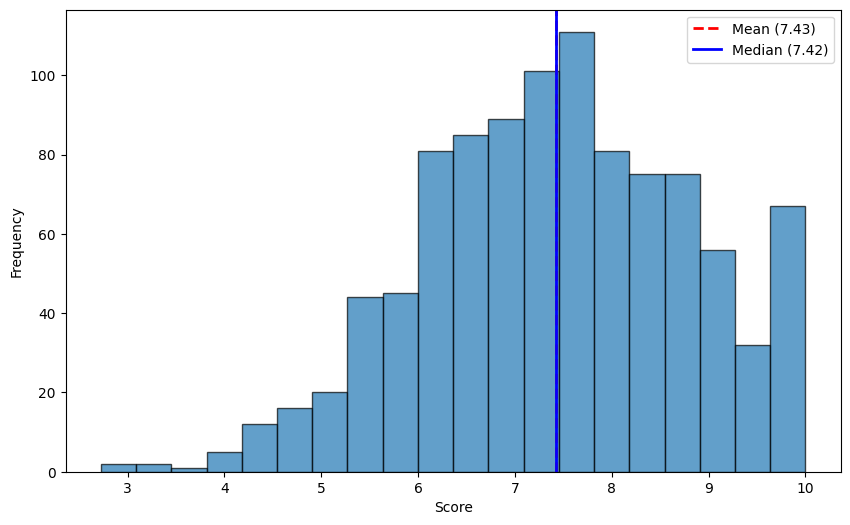

In [11]:
#히스토그램을 그리고 평균과 중앙값 선으로 표시
plt.figure(figsize=(10, 6))
plt.hist(df1['score'], bins=20, edgecolor='black', alpha=0.7)

# 평균선
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean ({mean_val:.2f})")

# 중앙값선
plt.axvline(median_val, color='blue', linestyle='-', linewidth=2, label=f"Median ({median_val:.2f})")

# 그래프

plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()

plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 평균과 중앙값 사이의 차이는 어느 정도인가요?
    - 두 값이 비슷하다면, 이 데이터는 어떤 분포 형태일 가능성이 있을까요? (예: 대칭형, 정규분포 등)

    *대칭적인 분포 형태 가능( 평균과 중앙값이 거의 동일)
    
    - 두 값의 차이가 크다면, 그 이유는 무엇일까요?

    **극단값의심하여 치우친 분포 존재확인
    *평균>중앙값(만족도8-10)
    *평균<중앙값(불만족 고객 존재)

    - 어떤 값들이 평균을 끌어내리거나 끌어올렸을까요?

    *극단값은 평균에 영향을 줌

2. 최빈값이 평균보다 낮은 경우, 낮은 점수를 준 고객이 많다는 뜻일 수 있습니다. 이 경우 데이터 분포는 어느 쪽으로 치우쳐 있을까요?

   *왼쪽

    - 반대로 최빈값이 평균보다 높은 경우에는 어떤 해석이 가능할까요? 이럴 때 분포가 어떻게 달라질 수 있을까요?

  
    *오른쪽에 몰려 있고, 왼쪽으로 꼬리가 길어짐으로
    대부분 만족하지만, 일부 불만족 고객이 존재한다는 신호

3. 이 데이터를 바탕으로 고객 만족도를 높이기 위한 마케팅 전략에는 어떤 것들이 있을까요?

*낮은 점수를 주는 고객 일부 존재함으로 불만족 고객의 원인 분석

**한정 고객 우대 특별 쿠폰 제공 / 1:1 CS 운영 / 프로모션

*만족도가 높은 고객을  위한 전략

**VIP/프리미엄 고객 대상 업셀링-추천 프로그램 / 긍정 경험을 마케팅 콘텐츠로 활용(바이럴 마케팅 활성화)  

# 문제 2. 평균 vs 중앙값 비교
**📘 문제**
- A지역과 B지역의 연봉 데이터를 비교해 봅시다.
- B 지역에는 일부 고소득자가 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**
- 각 지역의 평균 연봉과 중앙값을 구해 봅시다.
- 지역별 박스플롯(Boxplot)을 그려서 분포의 차이를 시각적으로 확인해 봅시다.

In [13]:
# 데이터 생성
np.random.seed(2025)

# A 지역: 평균 300, 표준편차 50
region_a = np.random.normal(300, 50, 100)

# B 지역: 일반 소득자 + 극단적인 고소득자 포함
region_b = np.concatenate([
    np.random.normal(280, 40, 95),    # 일반 소득자 95명
    np.random.normal(1500, 200, 5)    # 고소득자 5명
])

df2 = pd.DataFrame({
    'region': ['A'] * 100 + ['B'] * 100,
    'salary': np.concatenate([region_a, region_b])
})

In [14]:
# A지역과 B지역의 연봉 데이터를 비교
# 평균 계산
mean_vals = df2.groupby('region')['salary'].mean()

# 중앙값 계산
median_vals = df2.groupby('region')['salary'].median()

print("지역별 평균 연봉:\n", mean_vals)
print("\n지역별 중앙값:\n", median_vals)

지역별 평균 연봉:
 region
A    292.506637
B    347.594909
Name: salary, dtype: float64

지역별 중앙값:
 region
A    294.324483
B    287.347488
Name: salary, dtype: float64


<Figure size 800x600 with 0 Axes>

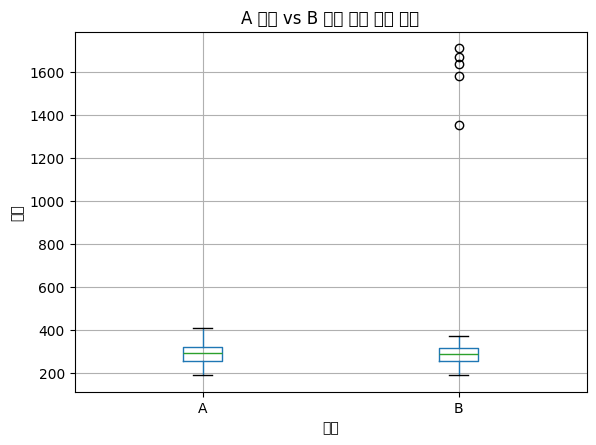

In [15]:
#지역별 박스플롯(Boxplot)을 그려서 분포의 차이를 시각
plt.figure(figsize=(8, 6))
df2.boxplot(column='salary', by='region')

plt.title("A 지역 vs B 지역 연봉 분포 비교")
plt.suptitle("")   # pandas boxplot 기본제목 제거
plt.xlabel("지역")
plt.ylabel("연봉")
plt.show()

In [16]:
# IQR 계산 함수
def calc_IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    return Q1, Q3, Q3 - Q1

# 지역별 IQR 계산
for region in ['A', 'B']:
    Q1, Q3, IQR = calc_IQR(df2[df2['region'] == region]['salary'])
    print(f"[{region} 지역]")
    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR (Q3 - Q1): {IQR:.2f}\n")


[A 지역]
Q1 (25%): 256.52
Q3 (75%): 322.20
IQR (Q3 - Q1): 65.68

[B 지역]
Q1 (25%): 254.21
Q3 (75%): 314.53
IQR (Q3 - Q1): 60.32



**🧠 데이터를 어떻게 읽을까요?**
1. A 지역과 B 지역의 평균 연봉은 어떻게 다른가요?

  * A지역 연봉 : 약 290 / B지역 연봉 : 약 350

    - 두 지역의 평균 차이가 의미하는 바는 무엇인가요?

    **아주 크거나 아주 작은 값(극단값) 하나만 있어도 평균에 영향

    - 고소득자가 있는 지역의 평균은 어떤 영향을 받을까요?

    **대부분의 사람들은 A지역 연봉과 비슷하나 극단적으로 큰 값(이상치)으로 인해 실제 연봉보다 왜곡됨

2. 중앙값은 어떠한가요?

   ** A,B  지역 median  약 280

    - 평균과 비교했을 때, 중앙값이 더 낮거나 높다면 어떤 해석이 가능할까요?
    
    **A지역 : 평균과 중앙값이 비슷하여 박스 플롯에서 대칭적인 형태일 가능성이 높음으로 정상적인 연봉 분포 확인

    **B지역 : 일반 고득자의 평균과 중앙값은 A지역과 비슷하나
    고소득자(5명) 존재함으로(박스플롯) 평균이 올라감

    ->소수의 큰 값 때문에 평균이 “왜곡”될 수 있음

    *** 중앙값< 평균 : 큰값존재 , 중앙값>평균 : 매우 낮은값존재
   

3. 극단값(고소득자)의 영향은 어디에서 더 크게 나타날까요?
    - 평균과 중앙값 중 어떤 지표가 극단값에 더 민감한가요?

    평균은 극단값에 끌려 올라감으로 B 지역에 고소득자가 포함되어 평균연봉이 실제보다 훨씬 높게 나타날 가능성있음

4. 박스플롯을 통해 어떤 점을 관찰할 수 있나요?
    - 이상치(Outlier)는 어떻게 표시되나요?

    B 지역 박스플롯에 **위쪽에 큰 이상값 점**이 생김

    - 두 지역의 분포 폭(사분위 범위)은 어떻게 다른가요?

    IQR = Q3(전체 중 위쪽 25% ) - Q1(낮은 쪽에서 25%)
    -> 가운데 50% 데이터가 얼마나 퍼져 있는지 확인

    **A지역: IQR이 비교적 넓고 일정할 확률이 높음
      B지역: IQR은 가운데 50%만 반영해서
      극단적인 고소득자    5명은(이상값) IQR에 거의 영향을 주지 않는다   



5. 평균만 보고 판단했을 때 생길 수 있는 오해는 무엇인가요?

   *평균은 극단값의 영향을 심하게 받음으로 현실 왜곡 가능

    - 어떤 경우에는 중앙값이 더 유용한 지표일 수 있을까요?

    **중앙값은 극단값의 영향을 거의 받지 않음으로
    불균형한 분포를 비교 분석할때, 극단값이 존재 할 때
    평균값보다 신뢰할 수 있는 지표임.




# 문제 3. 이상값과 분산 비교
**📘 문제**
- 1반과 2반의 시험 점수 분포를 비교해 봅시다.
- 2반에는 극단적인 이상값(예: 부정행위로 0점)이 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**
1. 각 반의 평균, 표준편차, 최소/최대값을 계산해 봅시다.
2. 박스플롯을 사용하여 두 반의 분포 차이를 시각적으로 비교해 봅시다.
3. 이상값이 통계 지표에 어떤 영향을 주는지 생각해 봅시다.


In [20]:
# 데이터 생성
np.random.seed(2025)  # 재현 가능성을 위해 시드 고정

# 1반: 평균 75, 표준편차 8
class1 = np.random.normal(75, 8, 30)

# 2반: 일반 학생 + 이상값(0점, 130점)
class2 = np.concatenate([
    np.random.normal(75, 15, 28),  # 일반 학생
    [0, 130]                       # 극단적인 이상값
])

df3 = pd.DataFrame({
    'class': ['1반'] * 30 + ['2반'] * 30,
    'score': np.concatenate([class1, class2])
})

In [22]:
# 기초 통계량 계산
summary = df3.groupby('class')['score'].agg(['mean', 'std', 'min', 'max'])
print(summary)

            mean        std        min         max
class                                             
1반     75.724316   7.062710  60.685416   92.175893
2반     73.728848  22.340818   0.000000  130.000000


<Figure size 800x600 with 0 Axes>

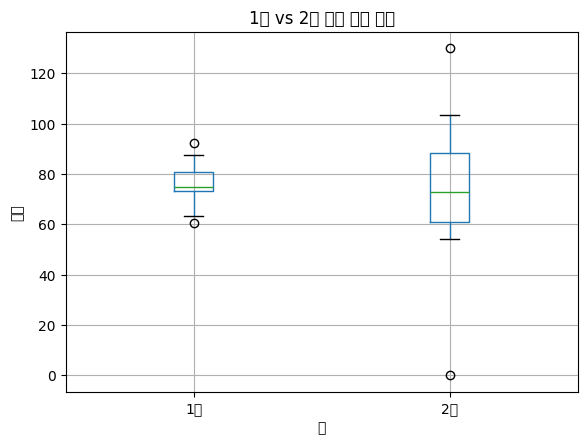

In [23]:
plt.figure(figsize=(8, 6))
df3.boxplot(column='score', by='class')

plt.title("1반 vs 2반 점수 분포 비교")
plt.suptitle("")  # 기본 제목 제거
plt.xlabel("반")
plt.ylabel("점수")
plt.show()


**🧠 데이터를 어떻게 읽을까요?**
1. 어떤 반의 점수 분산이 더 크고, 왜 그럴까요?

   => 2반의 분산이 훨씬 더 크다.
      2반은 점수 범위가 0점 ~ 130점으로 평균 75 대비 극단값존재

    - 점수 분포의 퍼짐 정도는 어떤 지표로 확인할 수 있을까요?
     
     std(표중편차-평균 기준 흩어진 정도)
     IQR(사분위 범위- 중간 50% 데이터의 퍼짐 정도)
     range(max-min -가장 높고 낮은 값 차이)

    - 이상값이 포함되면 표준편차나 범위는 어떻게 달라질까요?
    
      *극단값과 평균 사이의 거리가 크기 때문에
      → 표준편차가 비정상적으로 커진다.

2. 이상값이 있는 반의 평균은 어떤 영향을 받았나요?
    
    2반은 점수 범위가 0점 ~ 130점 (0점 1명, 130점 1명으로 평균에 영향을 받음으로 전반적인 성적 수준을 반영하지 못함)
    
    - 극단적으로 낮거나 높은 점수가 평균을 끌어내리거나 끌어올렸나요?

     점수 범위가 0점 ~ 130점 (0점 1명, 130점 1명)
     
    - 평균과 중앙값의 차이가 의미하는 바는 무엇인가요?
      
      2반처럼 이상값이 있는 경우:
       평균 ≠ 중앙값이 되며
       평균이 왜곡되었음을 알려주는 신호

3. 박스플롯을 통해 이상값은 어떻게 드러나나요?

     => 상자 밖 점으로 표시

    - 이상값(outlier)은 박스플롯에서 어떤 형태로 나타나나요?
       
       두 개의 점이 상자(중간 50%) 범위 밖에 찍힘
        (2반의 경우 0점 1명, 130점 1명 중간 범위 밖에 찍힘)

    - 두 반의 박스(사분위 범위)는 어떻게 다르게 보이나요?
      
      1반 : 정상 분포여서 박스(IQR)가 균일하고 안정적
      2반 : 이상값이 IQR 계산에는 영향을 주지 않으므로
        → 박스(IQR)는 1반과 크게 다르지 않음
        =>수염(whisker)이 훨씬 길다 (0점, 130점 때문에)
          상자 바깥에 이상값 점이 보인다     

4. 평균만 보고 평가했을 때 생길 수 있는 오해는 무엇인가요?
    1반에 비해 2반의 평균이 낮음으로 실력이 떨어졌다고 오해 가능
     
    - 예를 들어, 교사가 평균 점수만 보고 2반이 부족하다고 판단한다면?
     
     *평균을 깎아먹은 건 단 1명(0점)
     *나머지 학생들은 오히려 1반보다 더 높은 점수를 받고 있을 수 있음
     *평균은 극단값 하나에 너무 취약한 지표


    - 중앙값이나 표준편차 같은 지표와 함께 분석하는 것은 왜 중요할까요?
     
     *중앙값
     극단점수 영향을 거의 받지 않음
      → 반의 일반적인 실력을 가장 정확하게 보여줌

     *표준편차
     점수들이 얼마나 흩어져 있는지 알려줌
      → 2반은 극단점수 때문에 표준편차가 매우 높아짐
      → 성적의 일관성이 낮다는 신호

     *박스플롯
     시각적으로 이상값을 바로 확인
      → 평균이 왜곡된 이유를 바로 파악할 수 있음

      ++정확한 평가를 위한 도구


# 문제 4. IQR 이상값 제거
**📘 문제**
- 앞의 문제에서 2반에는 **극단적인 이상값(예: 매우 낮은 점수)**이 포함되어 있어
통계 지표, 특히 평균에 큰 영향을 주는 것을 확인했습니다.
- 이번에는 **IQR(사분위 범위)**을 기준으로 이상값을 제거한 뒤, 이상값 제거 전후의 평균을 비교해 봅시다

<br>

**📌 아래를 수행해 보세요:**
- 2반의 점수 데이터를 대상으로 IQR 기준을 사용해 이상값을 판별하고 제거해 봅시다.
- 이상값 제거 전과 제거 후의 평균을 각각 계산해 봅시다.
- 이상값 제거가 평균에 어떤 영향을 주는지 설명해 봅시다.
- 필요하다면 중앙값과도 비교해 봅시다.

In [28]:
# 2반의 데이터만 추출
class2_scores = df3[df3['class'] == '2반']['score']

#IQR 기준으로 이상값 판별
Q1 = class2_scores.quantile(0.25)
Q3 = class2_scores.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Q1, Q3, IQR, lower_bound, upper_bound

#예상되는 이상값: 0점, 130점 -> 확인(+)
outliers = class2_scores[(class2_scores < lower_bound) | (class2_scores > upper_bound)]
print("2반 이상값:\n", outliers.values)

#이상값 제거 후 데이터 생성
class2_clean = class2_scores[(class2_scores >= lower_bound) & (class2_scores <= upper_bound)]

#이상값 제거 전·후 평균 계산
mean_before = class2_scores.mean()
mean_after = class2_clean.mean()

print("이상값 제거 전 평균:", mean_before)
print("이상값 제거 후 평균:", mean_after)

#이상값 제거 전·후 중앙값 계산
median_before = class2_scores.median()
median_after = class2_clean.median()

print("제거 전 중앙값:", median_before)
print("제거 후 중앙값:", median_after)



2반 이상값:
 [  0. 130.]
이상값 제거 전 평균: 73.72884842544566
이상값 제거 후 평균: 74.35233759869178
제거 전 중앙값: 73.00372633167626
제거 후 중앙값: 73.00372633167626


**🧠 데이터를 어떻게 읽을까요?**
1. 이상값 제거 전후 평균은 어떻게 달라졌나요?

    0점과 130점 때문에 크게 증감함으로
    평균값 비정상적인 값이 됨
    =>제거 후 평균
      나머지(28명)는 약 75점 ± 15 수준
        → 평균이 정상적으로 70~80 근처로 돌아감

    - 평균이 중앙값에 가까워졌나요?
       
       =>중앙값은 극단값 영향을 거의 안 받음
           이상값 제거 전엔: 평균 ≠ 중앙값
           제거 후엔: 평균 ≈ 중앙값
           중앙값은 극단값 영향을 거의 안 받음
     
    - 이상값 제거가 평균에 어떤 방향으로 영향을 주었나요?

       0점과 130점 때문에 크게 증감하여 평균에 영향을 줬으나
       중앙값쪽으로 방향이 움직임

2. 왜 IQR을 기준으로 이상값을 판단할까요?
    
     데이터의 중간 50%**만 이용해 분포 이해

    - IQR은 데이터를 어떻게 나누고, 어떤 방식으로 이상값을 정의하나요?


      IQR = Q3 − Q1
       대부분의 중간 값과 너무 멀리 떨어진 값 = 이상값

    - 평균이나 표준편차 기준과 비교했을 때 어떤 점이 더 강건할까요?

      IQR은 “가운데 50% 데이터”만 이용
      따라서 극단값이 있어도 Q1, Q3는 거의 변하지 않음
       → 더 강건한 통계 지표

3. 이상값은 언제 제거하고, 언제 유지해야 할까요?

     *제거해야 하는 경우 (실수·오류)
       
       입력 실수(예: 100 → 1000 잘못 입력)
       측정 장비 오류
       현실적으로 불가능한 값
       분석 목적이 “일반적인 경향 파악”일 때

     * 유지해야 하는 경우 (중요한 신호)
      
      진짜 극단적인 사용자 행동을 보고 싶을 때
      사기 탐지(비정상적 거래)
      VIP 고객(매출 상위 1%)
      교육에서 0점이나 만점이 실제 중요한 정보일 때
   
    - 분석 목적에 따라 이상값은 중요한 정보가 될 수 있습니다.

4. 중앙값과 평균은 각각 어떤 상황에서 더 유용한 지표인가요?

    상황	          추천 지표	          이유

   이상값이 많음	      중앙값	   극단값 영향 거의 없음

   정규분포(대칭형)	     평균	     분포 중심을 잘 나타냄

   소득·집값·매출
   (극단값 존재)	      중앙값	   전형적 값을 더 정확히 보여줌

   공정성·정책 수립	   중앙값     평균보다 왜곡 적음

   전체 분포의 무게
   중심을 알고 싶음	      평균	    모든 값을 반영
     
    - 이상값이 있을 때 어떤 지표가 더 신뢰할 수 있나요?

    =>중앙값

    - 두 지표를 함께 보면 어떤 장점이 있을까요?
     
     =>평균과 중앙값의 차이를 보면 이상값의 존재 여부와 분포 형태를 한눈에 파악
     


# 문제 5. 변수 유형 분류
**📘 문제**
- 아래 데이터에서 변수의 유형(연속형, 범주형, 이산형 등)을 구분해 봅시다.
- 변수의 의미를 고려하여 어떤 분석 방식이 적절한지도 함께 생각해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

1. 각 변수의 데이터 타입을 확인해 봅시다.

2. 변수의 의미를 기준으로 다음 중 어떤 유형에 해당하는지 분류해 봅시다.
    - 연속형 (numeric-continuous)
    - 이산형 (numeric-discrete)
    - 범주형 (categorical)
    - 서열형 범주 (ordinal-categorical)


In [29]:
# 데이터 생성
np.random.seed(2025)
df5 = pd.DataFrame({
    'age': np.random.randint(18, 65, 200),
    'coffee_type': np.random.choice(['아메리카노', '라떼', '카페모카'], 200),
    'size': np.random.choice(['Small', 'Medium', 'Large'], 200),
    'price': np.random.normal(4500, 500, 200),
    'satisfaction': np.random.randint(1, 6, 200)
})

📌 df5.dtypes
age               int64
coffee_type      object
size             object
price           float64
satisfaction      int64
dtype: object


📌 변수 의미 기준 유형 분류

[age]
  - dtype          : int64
  - 논리적 변수 유형: numeric-discrete (이산형)
  - 설명           : 나이 (정수 단위, 개수 개념)

[coffee_type]
  - dtype          : object
  - 논리적 변수 유형: categorical (범주형)
  - 설명           : 커피 종류 (아메리카노/라떼/카페모카)

[size]
  - dtype          : object
  - 논리적 변수 유형: ordinal-categorical (서열형 범주)
  - 설명           : 사이즈 (Small < Medium < Large 순서)

[price]
  - dtype          : float64
  - 논리적 변수 유형: numeric-continuous (연속형)
  - 설명           : 가격 (소수 포함 연속적인 값)

[satisfaction]
  - dtype          : int64
  - 논리적 변수 유형: ordinal-categorical (서열형 범주)
  - 설명           : 만족도 1~5점 (순서만 의미)



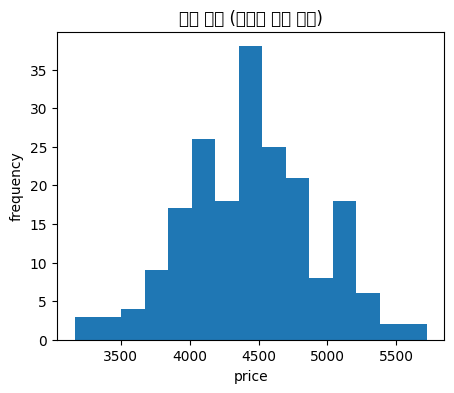

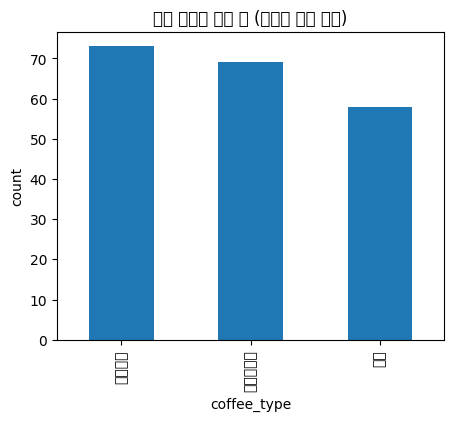

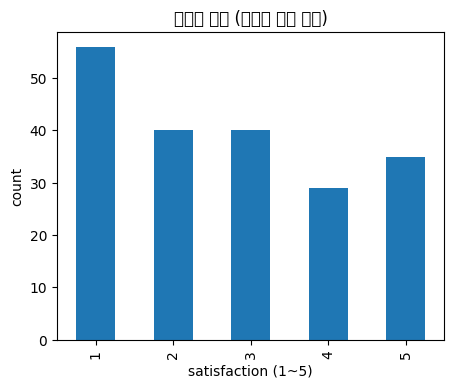

In [30]:
# 1) 각 변수의 데이터 타입 확인
print("📌 df5.dtypes")
print(df5.dtypes)
print("\n")

# 2) 의미 기준 변수 유형 분류 (수동 정의)
var_types = {
    "age": {
        "dtype": str(df5["age"].dtype),
        "logical_type": "numeric-discrete (이산형)",
        "description": "나이 (정수 단위, 개수 개념)"
    },
    "coffee_type": {
        "dtype": str(df5["coffee_type"].dtype),
        "logical_type": "categorical (범주형)",
        "description": "커피 종류 (아메리카노/라떼/카페모카)"
    },
    "size": {
        "dtype": str(df5["size"].dtype),
        "logical_type": "ordinal-categorical (서열형 범주)",
        "description": "사이즈 (Small < Medium < Large 순서)"
    },
    "price": {
        "dtype": str(df5["price"].dtype),
        "logical_type": "numeric-continuous (연속형)",
        "description": "가격 (소수 포함 연속적인 값)"
    },
    "satisfaction": {
        "dtype": str(df5["satisfaction"].dtype),
        "logical_type": "ordinal-categorical (서열형 범주)",
        "description": "만족도 1~5점 (순서만 의미)"
    }
}

print("📌 변수 의미 기준 유형 분류\n")
for col, info in var_types.items():
    print(f"[{col}]")
    print(f"  - dtype          : {info['dtype']}")
    print(f"  - 논리적 변수 유형: {info['logical_type']}")
    print(f"  - 설명           : {info['description']}\n")


# 3) 변수 유형별 간단한 시각화 예시 ------------------------

# (1) 연속형: price 히스토그램
plt.figure(figsize=(5,4))
plt.hist(df5["price"], bins=15)
plt.title("가격 분포 (연속형 변수 예시)")
plt.xlabel("price")
plt.ylabel("frequency")
plt.show()

# (2) 범주형: coffee_type 막대그래프
plt.figure(figsize=(5,4))
df5["coffee_type"].value_counts().plot(kind="bar")
plt.title("커피 종류별 주문 수 (범주형 변수 예시)")
plt.xlabel("coffee_type")
plt.ylabel("count")
plt.show()

# (3) 서열형: satisfaction 막대그래프
plt.figure(figsize=(5,4))
df5["satisfaction"].value_counts().sort_index().plot(kind="bar")
plt.title("만족도 분포 (서열형 변수 예시)")
plt.xlabel("satisfaction (1~5)")
plt.ylabel("count")
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 숫자처럼 보이지만 사실은 범주형 또는 서열형으로 해석하는 변수가 있다면 무엇일까요?

  1) 만족도(satisfaction) — 1~5점

   숫자처럼 보이지만 사실 서열형(ordinal)

    =>1 < 2 < 3 < 4 < 5 순서만 의미

    점수 사이가 1씩 차이나도,
    실제 의미는 “동일한 거리”가 아닐 수 있음

   예: 1→2는 큰 변화, 4→5는 미세한 변화 등


  2) 등급, 레벨(Grade, Level 등)

   예: 1, 2, 3등급

   VIP(1), GOLD(2), SILVER(3)

   성능 등급(1~5)

   이 숫자는 “순서를 나타내는 라벨”일 뿐
   연속적인 수치 아님 → 서열형

  3) 나이 대(age group) :범주형(명목형 또는 경우에 따라 서열형)

   예:20대=1, 30대=2, 40대=3 …
   숫자처럼 보이지만 이건 범주형,
   나이 그룹을 구분하는 코드일 뿐.

  4) 우편번호, 고객번호, 제품번호 :범주형 (nominal)

   숫자로 되어있지만 계산 의미 없음

   10001번 고객이 10002번 고객보다 “큰 고객”이 아니다

   더하기/빼기/평균 같은 연산 불가능


  5) 설문 응답(1=예, 0=아니오) : 범주형(binary categorical)

   숫자로 표현해도 본질은 이진 범주형


2. 변수 유형에 따라 적절한 분석 방법이나 시각화 방식은 어떻게 달라질까요?
   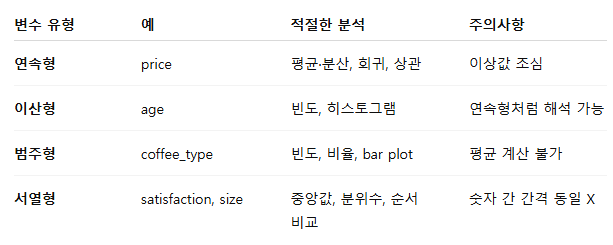

# 문제 6. 상관관계 분석
**📘 문제**
- 이번에는 변수들 간의 **관계(상관관계)**를 분석해 봅시다.
- 특히 기온(`temp`), 습도(`humidity`), 판매(`sales`) 변수 간의 관계를 수치와 시각화로 살펴보겠습니다.


<br>

**📌 아래를 수행해 보세요:**
1. 아래의 기온, 습도, 매출 데이터를 사용하여 상관계수 행렬을 출력해 봅시다.

2. 페어플롯(pairplot)을 이용하여 변수 간의 관계를 시각화해 봅시다.

In [ ]:
# 데이터 생성
np.random.seed(202)

temp = np.random.normal(25, 5, 100)
humidity = np.random.normal(60, 10, 100)
sales = temp * 10 - humidity * 2 + np.random.normal(0, 20, 100) + 200

df6 = pd.DataFrame({'temp': temp, 'humidity': humidity, 'sales': sales})

In [ ]:
# 여기에 코드 작성

**🧠 데이터를 어떻게 읽을까요?**

1. 출력된 상관계수 행렬을 보고,
    - 어떤 변수와 `sales` 간의 상관계수가 가장 높은가요?
    - 어느 쌍이 **양의 상관관계**, 어느 쌍이 **음의 상관관계**인가요?

2. 페어플롯에서
    - 어떤 변수 쌍은 **직선 형태**로 관계가 보이나요?
    - 어떤 변수 쌍은 **분산이 크거나 패턴이 없는**가요?

3. **상관관계가 반드시 인과관계를 의미하지는 않습니다.**
    - 온도와 매출에 상관관계가 있다고 해서, 온도가 매출을 직접적으로 증가시킨다고 볼 수 있을까요?

4. 이 데이터를 바탕으로 어떤 **추가 가설**이나 **실험 설계**를 생각해볼 수 있을까요?

# 문제 7. 범주형 변수 시각화
**📘 문제**
- 앞에서는 수치형 변수의 분포를 시각화하고, 변수 간의 관계도 살펴보았습니다.
- 이번에는 범주형 변수인 커피 음료 데이터를 시각화해 봅시다.
- 어떤 종류가 많이 판매되었는지 빈도 분석을 통해 알아보겠습니다.

<br>

**📌 아래를 수행해 보세요:**
1. 아래 데이터에서 drink 변수는 판매된 음료의 종류를 나타냅니다.
    - 각각 몇 개씩 판매되었는지 빈도표를 만들어 확인해 봅시다.
    - **막대그래프(bar plot)**를 그려서 결과를 시각화해 봅시다.


2. 시각화 결과를 보고,
    - 어떤 음료가 가장 많이 팔렸는지 파악해 봅시다.
    - 이 결과를 마케팅 전략에 어떻게 활용할 수 있을지 생각해 봅시다.

In [ ]:
# 데이터 생성
df7 = pd.DataFrame({
    'drink': np.random.choice(['아메리카노', '라떼', '콜드브루'], 300)
})

In [ ]:
# 여기에 코드 작성

**🧠 데이터를 어떻게 읽을까요?**
1. 출력된 빈도표와 막대그래프를 보면, 어떤 음료가 가장 많이 판매되었나요?
    - 판매량이 가장 많은 음료는?
    - 그 다음으로 인기 있는 음료는?

2. 이 결과는 어떤 마케팅 전략에 활용할 수 있을까요?
    - 가장 많이 팔린 음료를 주력 상품으로 홍보해야 할까요?
    - 판매량이 적은 음료를 프로모션 대상으로 삼는 것은 어떨까요?

3. 막대그래프는 왜 범주형 변수에 적합할까요?
    - `drink`처럼 종류가 명확히 나뉘는 변수를 분석할 때 어떤 점이 중요한가요?

4. 범주형 변수 분석 시 주의할 점은?

# 문제 8. 요일별 평균 비교
**📘 문제**

- 이번에는 요일 별 소비 금액 데이터를 분석해 봅시다.
- 각 요일마다 평균 소비 금액이 얼마나 되는지 비교하고,
**평일과 주말의 소비 패턴 차이**도 함께 살펴보겠습니다.


<br>

**📌 아래를 수행해 보세요:**
1. 아래 데이터를 사용하여 `day`(요일)별 `amount`(소비 금액)의 평균을 계산해 봅시다.
2. 요일별 평균 금액을 **막대그래프(bar plot)**로 시각화해 봅시다.

In [ ]:
# 데이터 생성
df8 = pd.DataFrame({
    'day': np.random.choice(['월', '화', '수', '목', '금', '토', '일'], 500),
    'amount': np.random.normal(12000, 2000, 500)
})

In [ ]:
# 여기에 코드 작성

**🧠 데이터를 어떻게 읽을까요?**
1. 어떤 요일에 소비 금액이 가장 높나요?
    - 주말(토, 일)과 평일(월~금) 중 어떤 쪽의 평균이 더 높은가요?

2. 소비 금액이 적은 요일은 언제인가요? 왜 그럴까요?

3. 이 결과를 어떻게 활용할 수 있을까요?
    - 주말에 더 많은 재고를 준비하거나
    - 평일에 할인 이벤트를 기획하는 등의 운영/마케팅 전략으로 이어질 수 있을까요?

> 💬 정리해 보기
> - 범주형 변수(요일)별로 연속형 변수(소비 금액)의 평균을 비교하면 소비 패턴을 이해하고 전략을 수립하는 데 유용한 인사이트를 얻을 수 있습니다.

# 문제 9. 정규분포와 표준편차

**📘 문제**
- 정규분포와 표준편차의 개념을 실제 데이터에 적용해 보겠습니다.
- 정규분포를 따르는 점수 데이터에서 다음을 확인해 봅시다:
    - 평균 ±1σ, 평균 ±2σ 범위에 속한 값들의 비율은 실제로 얼마나 되는가?
    - 이 결과가 이론적인 68-95-99 법칙과 얼마나 유사한지 비교해 봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. 평균이 70, 표준편차가 10인 정규분포 데이터를 1000개 생성해 봅시다.
2. 평균을 중심으로 ±1σ, ±2σ 범위에 포함되는 데이터의 비율을 계산해 봅시다.
3. 결과를 바탕으로 68-95-99 법칙과 비교해 봅시다.

In [ ]:
# 여기에 코드 작성

**🧠 데이터를 어떻게 읽을까요?**

1. ±1σ, ±2σ 범위에 실제로 몇 %의 데이터가 포함되었나요?
2. 이 결과는 68–95–99 법칙과 얼마나 비슷했나요?
3. 표준편차는 왜 중요한 지표인가요?
4. 이 개념이 실제로 어떻게 활용될 수 있을까요?

# 문제 10. 표본 평균 실험

**📘 문제**
- 큰 모집단에서 표본을 여러 번 추출하여 표본 평균의 분포를 비교해봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. 평균이 100, 표준편차가 15인 모집단을 생성합니다.
2. 다음 두 조건에서 각각 1000번씩 표본 평균을 구합니다:
    - 표본 크기 5
    - 표본 크기 50
3. 두 조건의 **표본 평균 분포(histogram)**를 비교합니다.

In [ ]:
# 여기에 코드 작성

**🧠 데이터를 어떻게 읽을까요?**

1. **표본 크기가 다를 때 표본 평균 분포는 어떻게 달라졌나요?**
2. **왜 표본 크기가 중요할까요?**
3. **이 개념은 실제로 어디에 활용될 수 있을까요?**

# 문제 11. 단순 선형 회귀 분석

**📘 문제**
- 공부 시간과 성적 간의 관계를 회귀 분석으로 확인해봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. 공부 시간(`study_time`)과 성적(`score`)간의 관계를 단순 선형 회귀모델로 분석합니다.
2. 회귀 모델을 학습하고, 기울기(계수)와 절편을 출력해 봅시다.
3. 산점도 위에 회귀선을 시각화해 봅시다.

In [ ]:
# 데이터 생성
from sklearn.linear_model import LinearRegression

np.random.seed(505)
study_time = np.random.normal(5, 2, 100)
score = 50 + study_time * 8 + np.random.normal(0, 5, 100)
df11 = pd.DataFrame({'study_time': study_time, 'score': score})

**🧠 데이터를 어떻게 읽을까요?**

1. 공부 시간이 성적에 어떤 영향을 주었나요?
2. 회귀선은 데이터를 잘 설명하고 있나요?
3. 이 회귀식을 현실에 적용할 수 있을까요?
4. 선형 회귀분석은 언제 활용할 수 있을까요?

# 문제 12. A/B 테스트 해석

**📘 문제**
- 두 그룹의 전환율 차이를 계산하고 해석해봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. A 그룹과 B 그룹의 전환 데이터를 살펴봅니다.
2. 각 그룹의 전환율을 계산하고, 차이를 확인합니다.
3. 이 차이가 우연인지, 의미 있는 차이인지 생각해 봅시다.

In [ ]:
# 데이터 생성
np.random.seed(606)
group_a = np.random.binomial(1, 0.12, 1000)
group_b = np.random.binomial(1, 0.15, 1000)

**🧠 데이터를 어떻게 읽을까요?**

1. 두 그룹의 전환율 차이는 얼마나 되나요?
2. 차이가 '의미 있다'는 건 무엇을 뜻하나요?
3. 이 실험 결과로 어떤 결정을 내릴 수 있을까요?
4. A/B 테스트는 현실에서 어떻게 쓰일까요?